In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import torch
import sys
from helpers_task_detector import *
sys.path.append('../')
from src.helpers import *
from src.visualize import *
from src.trainer import *
from src.trainer_hnet import * 
from Models.models import *

/home/nerea/anaconda3/envs/sinthlab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
experiment_name = 'Experiment60_control'
path_results = './Results/' + experiment_name

In [3]:
path_to_hnets = './Models/Models_HNET'
data_path = './Data/Sim_Data_'+'Experiment60'+'.pkl'

#models_exp = np.sort(os.listdir(os.path.join(path_to_hnets, experiment_name)))

with open(os.path.join(data_path), 'rb') as fp:
    data = pickle.load(fp)

In [4]:
data.keys()

dict_keys(['Data_1_2', 'Data_2_2', 'Data_4_1', 'Data_4_2', 'Data_1_1', 'Data_2_1', 'Data_0_1', 'Data_3_1', 'Data_3_2', 'Data_0_2'])

In [5]:
with open(os.path.join(path_results +'.pkl'), 'rb') as fp:
    results = pickle.load(fp)

In [6]:
results.keys()

dict_keys(['Data_1_2', 'Data_2_2', 'Data_4_1', 'Data_4_2', 'Data_1_1', 'Data_2_1', 'Data_0_1', 'Data_3_1', 'Data_3_2', 'Data_0_2'])

In [7]:
dataset = []
r2_test_detector = []
r2_test_hnet = []
y_true_detector = []
y_pred_detector = []
y_true_hnet = []
y_pred_hnet = []
predicted_task = []
new_task = []
max_id = 0
found_ids = []
true_task = []
train_loss = []
val_loss = []

true_task_map = {}
for d in data.keys():
    new_id = d.split('_')[1]
    if new_id not in found_ids:
        found_ids.append(new_id)
        true_task_map[d] = max_id
        max_id += 1
    else:
        idx_id = found_ids.index(new_id)
        true_task_map[d] = idx_id

In [8]:
true_task_map

{'Data_1_2': 0,
 'Data_2_2': 1,
 'Data_4_1': 2,
 'Data_4_2': 2,
 'Data_1_1': 0,
 'Data_2_1': 1,
 'Data_0_1': 3,
 'Data_3_1': 4,
 'Data_3_2': 4,
 'Data_0_2': 3}

In [9]:
results['Data_1_1'].keys()

dict_keys(['predicted_task', 'new_task', 'r2_test_detector', 'r2_test_hnet', 'y_true_hnet', 'y_pred_hnet'])

In [10]:
for set in results.keys():
    dataset.append(set)
    print(set)
    r2_test_detector.append(results[set]['r2_test_detector'])
    r2_test_hnet.append(results[set]['r2_test_hnet'])
    predicted_task.append(results[set]['predicted_task'])
    new_task.append(results[set]['new_task'])
    true_task.append(true_task_map[set])
    if 'y_true_hnet' in results[set].keys():
        y_true_hnet.append([results[set]['y_true_hnet']])
        y_pred_hnet.append([results[set]['y_pred_hnet']])
        
    else:
        y_true_hnet.append([0])
        y_pred_hnet.append([0])
        
    if 'y_true_detector' in results[set].keys():
        y_true_detector.append([results[set]['y_true_detector']])
        y_pred_detector.append([results[set]['y_pred_detector']])
        train_loss.append([results[set]['hnet_train_losses']])
        val_loss.append([results[set]['hnet_val_losses']])
    else:
        y_true_detector.append([0])
        y_pred_detector.append([0])
        train_loss.append([0])
        val_loss.append([0])

Data_1_2
Data_2_2
Data_4_1
Data_4_2
Data_1_1
Data_2_1
Data_0_1
Data_3_1
Data_3_2
Data_0_2


In [11]:
df = pd.DataFrame({'Dataset':dataset,
                   'True_Task': true_task,
                   'Predicted_Task' : predicted_task,
                   'New_Task': new_task, 
                    'Y_t_detector': y_true_detector,
                    'Y_p_detector':y_pred_detector,  
                    'R2_Detector':r2_test_detector,
                    'Y_t_hnet': y_true_hnet,
                    'Y_p_hnet':y_pred_hnet,  
                    'R2_hnet':r2_test_hnet, 
                    'HNET_training_loss': train_loss,
                    'HNET_val_loss': val_loss})

In [12]:
df

,Dataset,True_Task,Predicted_Task,New_Task,Y_t_detector,Y_p_detector,R2_Detector,Y_t_hnet,Y_p_hnet,R2_hnet,HNET_training_loss,HNET_val_loss
0,Data_1_2,0,0,True,"[[[-0.5063821, -2.0975661], [-0.5946211, -2.02...","[[[-1.0448058, -0.046122804], [-0.8043318, -0....",0.859007,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.0227113 -2.1925476], [-0.72876567 -1.39...",0.832271,"[[7.1528343796730045, 2.0302540573206813, 1.20...","[[5.144099622964859, 4.00249889918736, 3.82725..."
1,Data_2_2,1,1,True,"[[[-0.5063821, -2.0975661], [-0.5946211, -2.02...","[[[-1.6927298, -1.1806978], [-1.1462356, -1.29...",0.877267,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-0.04285318 -0.59975755], [ 1.0858741 -0.6...",0.825777,"[[6.870702596144243, 1.6096649278293957, 0.971...","[[4.196858376264572, 3.0271829473120824, 2.965..."
2,Data_4_1,2,2,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.53206944, -0.8940995], [0.086459905, -0.5...",0.873341,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-1.1251785 -0.6284183], [ 0.8102598 -0.17...",0.804771,"[[8.137941885877538, 2.8224264559922396, 1.580...","[[6.2095381159048815, 4.022504451183172, 3.839..."
3,Data_4_2,2,2,False,[0],[0],0.872246,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.1540852 -1.6054368], [-2.8352466 1.297...",0.807309,[0],[0]
4,Data_1_1,0,0,False,[0],[0],0.879719,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-2.2249599 -1.3637137], [ 1.4619586 -1.115...",0.788583,[0],[0]
5,Data_2_1,1,1,False,[0],[0],0.879795,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-0.55457073 -0.41962385], [ 0.15303034 -1....",0.814533,[0],[0]
6,Data_0_1,3,3,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.235206, -0.6961443], [0.19307832, -0.4745...",0.864061,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[0.23336637 0.19302303], [-0.9784936 1.292...",0.835341,"[[6.136521445932211, 1.8506753422595836, 1.189...","[[4.970416651322291, 3.8897705720021176, 3.722..."
7,Data_3_1,4,4,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.30992544, -0.25704998], [0.41298681, 0.14...",0.848425,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-0.15687203 0.8483933 ], [ 1.0482575 -1.3...",0.821799,"[[7.746276524331835, 2.8441070947382183, 1.783...","[[6.324793187471537, 4.527065996940319, 4.1986..."
8,Data_3_2,4,4,False,[0],[0],0.854842,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[ 0.64397264 -1.4617283 ], [-1.8956409 -2.4...",0.791762,[0],[0]
9,Data_0_2,3,3,False,[0],[0],0.871812,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.6747506 -0.49059176], [ 0.05538645 -1....",0.842133,[0],[0]


In [13]:
path_to_hnets = './Models/Models_HNET'

models_exp = np.sort(os.listdir(os.path.join(path_to_hnets, experiment_name)))

with open(os.path.join(data_path), 'rb') as fp:
    data = pickle.load(fp)

In [14]:
data.keys()

dict_keys(['Data_1_2', 'Data_2_2', 'Data_4_1', 'Data_4_2', 'Data_1_1', 'Data_2_1', 'Data_0_1', 'Data_3_1', 'Data_3_2', 'Data_0_2'])

### Change and add here the true task to know which model to use

In [15]:
model = []
test_set = []
r2_list = []
data_name = []
for i,m in enumerate(models_exp):
    model_i = torch.load(os.path.join(path_to_hnets,experiment_name, m))
    for task,set in zip(df.True_Task, df.Dataset):
        perturbed_task = set.split('_')[1]

        if perturbed_task == '0':
            name = 'Baseline'
        elif perturbed_task == '1':
            name = 'Removed Neurons'    
        elif perturbed_task == '2':
            name = 'Shuffled Neurons'
        elif perturbed_task == '3':
            name = 'Gain' 
        elif perturbed_task == '4':
            name = 'Offset'

        pred_task = df.loc[df.Dataset == set].Predicted_Task.values
            
        if int(pred_task) <= i :
            W = model_i(cond_id = int(pred_task))
            main_net = RNN_Main_Model(num_features= 130, hnet_output = W,  hidden_size = 300,
                                num_layers= 1,out_dims=2,  
                                dropout= 0.2,  LSTM_ = False)
            x_train, y_train, x_val, y_val, x_test, y_test = data[set]
            r2, _ = calc_explained_variance_mnet(x_test, y_test, W, main_net)
            model.append(m)
            test_set.append(set)
            r2_list.append(r2)
            data_name.append(name)    

In [16]:
df_plot = pd.DataFrame({ 'Model':model,
                    'Name' : data_name,
                    'Dataset':test_set,
                    'R2': r2_list})

In [17]:
# Assuming df_plot is already defined
a = pd.DataFrame(df_plot.groupby(['Model', 'Name'])['R2'].mean())

In [18]:
a

R2
Model            Name                      
Model_Task_0.pth Removed Neurons   0.810482
Model_Task_1.pth Removed Neurons   0.142131
                 Shuffled Neurons  0.821963
Model_Task_2.pth Offset            0.804741
                 Removed Neurons  -0.029332
                 Shuffled Neurons  0.047492
Model_Task_3.pth Baseline          0.839765
                 Offset            0.089947
                 Removed Neurons   0.145026
                 Shuffled Neurons  0.004149
Model_Task_4.pth Baseline          0.470377
                 Gain              0.810624
                 Offset            0.179792
                 Removed Neurons   0.130344
                 Shuffled Neurons  0.058304

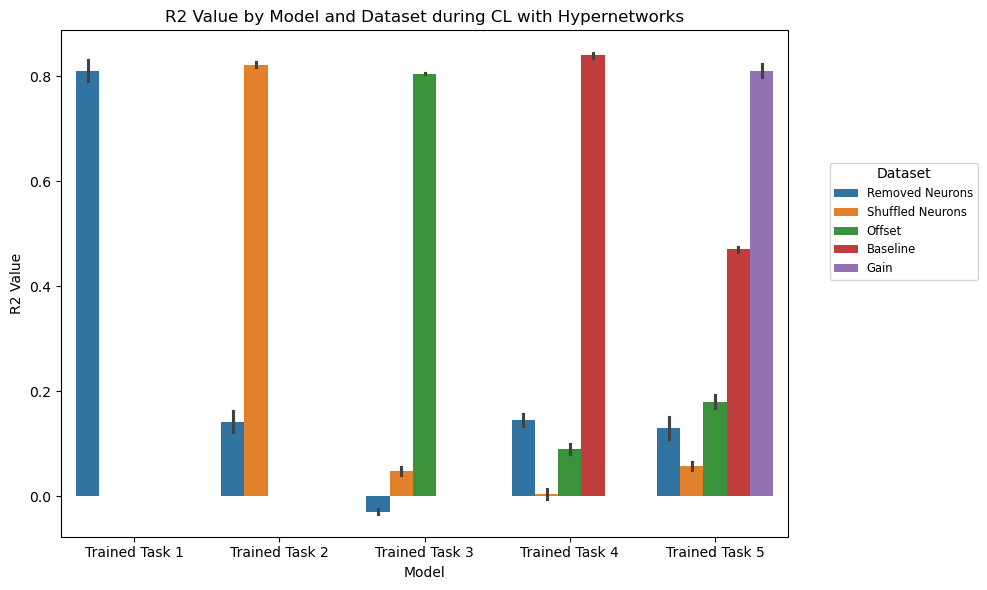

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))

sns.barplot(data=df_plot, x='Model', y='R2', hue='Name')#, color = 'Name', ci=None)  # ci=None to remove confidence intervals

plt.title('R2 Value by Model and Dataset during CL with Hypernetworks')

plt.xlabel('Model')

plt.ylabel('R2 Value')

new_labels = ['Trained Task 1', 'Trained Task 2', 'Trained Task 3', 'Trained Task 4', 'Trained Task 5']  # New labels for x-axis

plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

""" legend_labels = ['Baseline 1', 'Baseline 1', 'Removed Neurons 1', 'Removed Neurons 2',
                 'Shuffled Neurons 1', 'Shuffled Neurons 1', 'Added Gain 1', 'Added Gain 2',
                 'Added Offset 1', 'Added Offset 2']  # New labels for legend """

plt.legend(title='Dataset', fontsize = 'small', 
        bbox_to_anchor=(1.05, 0.75),
        loc='upper left') 
        #labels=legend_labels)  # Move legend to upper left corner

plt.tight_layout()
plt.show()

In [20]:
df_newtasks_control = df.loc[df.New_Task == True].reset_index()

In [21]:
df_newtasks_control

,index,Dataset,True_Task,Predicted_Task,New_Task,Y_t_detector,Y_p_detector,R2_Detector,Y_t_hnet,Y_p_hnet,R2_hnet,HNET_training_loss,HNET_val_loss
0,0,Data_1_2,0,0,True,"[[[-0.5063821, -2.0975661], [-0.5946211, -2.02...","[[[-1.0448058, -0.046122804], [-0.8043318, -0....",0.859007,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.0227113 -2.1925476], [-0.72876567 -1.39...",0.832271,"[[7.1528343796730045, 2.0302540573206813, 1.20...","[[5.144099622964859, 4.00249889918736, 3.82725..."
1,1,Data_2_2,1,1,True,"[[[-0.5063821, -2.0975661], [-0.5946211, -2.02...","[[[-1.6927298, -1.1806978], [-1.1462356, -1.29...",0.877267,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-0.04285318 -0.59975755], [ 1.0858741 -0.6...",0.825777,"[[6.870702596144243, 1.6096649278293957, 0.971...","[[4.196858376264572, 3.0271829473120824, 2.965..."
2,2,Data_4_1,2,2,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.53206944, -0.8940995], [0.086459905, -0.5...",0.873341,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-1.1251785 -0.6284183], [ 0.8102598 -0.17...",0.804771,"[[8.137941885877538, 2.8224264559922396, 1.580...","[[6.2095381159048815, 4.022504451183172, 3.839..."
3,6,Data_0_1,3,3,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.235206, -0.6961443], [0.19307832, -0.4745...",0.864061,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[0.23336637 0.19302303], [-0.9784936 1.292...",0.835341,"[[6.136521445932211, 1.8506753422595836, 1.189...","[[4.970416651322291, 3.8897705720021176, 3.722..."
4,7,Data_3_1,4,4,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.30992544, -0.25704998], [0.41298681, 0.14...",0.848425,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-0.15687203 0.8483933 ], [ 1.0482575 -1.3...",0.821799,"[[7.746276524331835, 2.8441070947382183, 1.783...","[[6.324793187471537, 4.527065996940319, 4.1986..."


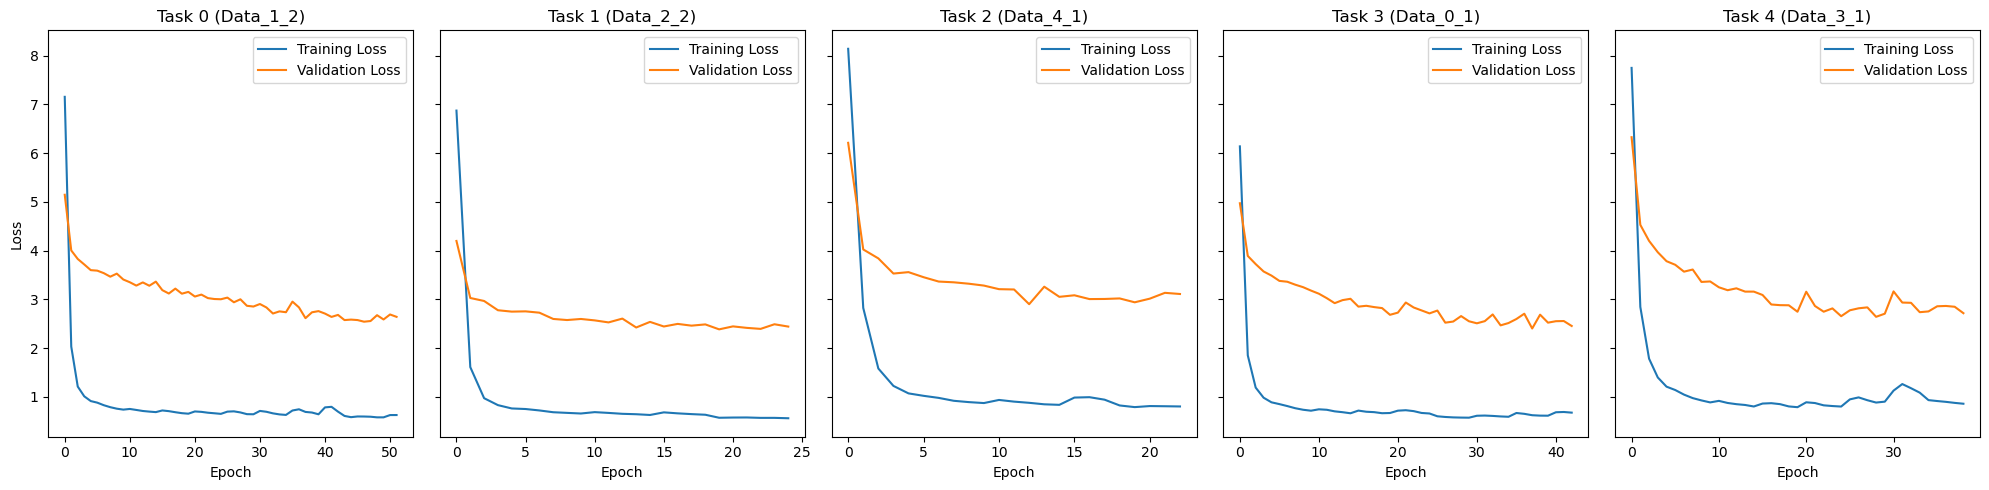

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for idx, row in df_newtasks_control.iterrows():
    axes[idx].plot(row['HNET_training_loss'][0], label='Training Loss')
    axes[idx].plot(row['HNET_val_loss'][0], label='Validation Loss')
    axes[idx].set_title(f'Task {idx} ({row["Dataset"]})')
    axes[idx].set_xlabel('Epoch')
    if idx == 0:
        axes[idx].set_ylabel('Loss')
    axes[idx].legend()

plt.tight_layout()
plt.show()

Now adding data from experiment 64 (same input, corrected script and same parameters but with CL)

In [23]:
experiment_name = 'Experiment64'
path_results = './Results/' + experiment_name

In [24]:
path_to_hnets = './Models/Models_HNET'
data_path = './Data/Sim_Data_'+'Experiment60'+'.pkl'

#models_exp = np.sort(os.listdir(os.path.join(path_to_hnets, experiment_name)))

with open(os.path.join(data_path), 'rb') as fp:
    data = pickle.load(fp)

In [25]:
data.keys()

dict_keys(['Data_1_2', 'Data_2_2', 'Data_4_1', 'Data_4_2', 'Data_1_1', 'Data_2_1', 'Data_0_1', 'Data_3_1', 'Data_3_2', 'Data_0_2'])

In [26]:
with open(os.path.join(path_results +'.pkl'), 'rb') as fp:
    results = pickle.load(fp)

In [27]:
results.keys()

dict_keys(['Data_1_2', 'Data_2_2', 'Data_4_1', 'Data_4_2', 'Data_1_1', 'Data_2_1', 'Data_0_1', 'Data_3_1', 'Data_3_2', 'Data_0_2'])

In [28]:
dataset = []
r2_test_detector = []
r2_test_hnet = []
y_true_detector = []
y_pred_detector = []
y_true_hnet = []
y_pred_hnet = []
predicted_task = []
new_task = []
max_id = 0
found_ids = []
true_task = []
train_loss = []
val_loss = []

true_task_map = {}
for d in data.keys():
    new_id = d.split('_')[1]
    if new_id not in found_ids:
        found_ids.append(new_id)
        true_task_map[d] = max_id
        max_id += 1
    else:
        idx_id = found_ids.index(new_id)
        true_task_map[d] = idx_id

In [29]:
true_task_map

{'Data_1_2': 0,
 'Data_2_2': 1,
 'Data_4_1': 2,
 'Data_4_2': 2,
 'Data_1_1': 0,
 'Data_2_1': 1,
 'Data_0_1': 3,
 'Data_3_1': 4,
 'Data_3_2': 4,
 'Data_0_2': 3}

In [30]:
results['Data_1_1'].keys()

dict_keys(['predicted_task', 'new_task', 'r2_test_detector', 'r2_test_hnet', 'y_true_hnet', 'y_pred_hnet'])

In [31]:
for set in results.keys():
    dataset.append(set)
    print(set)
    r2_test_detector.append(results[set]['r2_test_detector'])
    r2_test_hnet.append(results[set]['r2_test_hnet'])
    predicted_task.append(results[set]['predicted_task'])
    new_task.append(results[set]['new_task'])
    true_task.append(true_task_map[set])
    if 'y_true_hnet' in results[set].keys():
        y_true_hnet.append([results[set]['y_true_hnet']])
        y_pred_hnet.append([results[set]['y_pred_hnet']])
        
    else:
        y_true_hnet.append([0])
        y_pred_hnet.append([0])
        
    if 'y_true_detector' in results[set].keys():
        y_true_detector.append([results[set]['y_true_detector']])
        y_pred_detector.append([results[set]['y_pred_detector']])
        train_loss.append([results[set]['hnet_train_losses']])
        val_loss.append([results[set]['hnet_val_losses']])
    else:
        y_true_detector.append([0])
        y_pred_detector.append([0])
        train_loss.append([0])
        val_loss.append([0])

Data_1_2
Data_2_2
Data_4_1
Data_4_2
Data_1_1
Data_2_1
Data_0_1
Data_3_1
Data_3_2
Data_0_2


In [32]:
df = pd.DataFrame({'Dataset':dataset,
                   'True_Task': true_task,
                   'Predicted_Task' : predicted_task,
                   'New_Task': new_task, 
                    'Y_t_detector': y_true_detector,
                    'Y_p_detector':y_pred_detector,  
                    'R2_Detector':r2_test_detector,
                    'Y_t_hnet': y_true_hnet,
                    'Y_p_hnet':y_pred_hnet,  
                    'R2_hnet':r2_test_hnet, 
                    'HNET_training_loss': train_loss,
                    'HNET_val_loss': val_loss})

In [33]:
df

,Dataset,True_Task,Predicted_Task,New_Task,Y_t_detector,Y_p_detector,R2_Detector,Y_t_hnet,Y_p_hnet,R2_hnet,HNET_training_loss,HNET_val_loss
0,Data_1_2,0,0,True,"[[[-0.5063821, -2.0975661], [-0.5946211, -2.02...","[[[-1.0448058, -0.046122804], [-0.8043318, -0....",0.859007,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.0227113 -2.1925476], [-0.72876567 -1.39...",0.832271,"[[7.1528343796730045, 2.0302540573206813, 1.20...","[[5.144099622964859, 4.00249889918736, 3.82725..."
1,Data_2_2,1,1,True,"[[[-0.5063821, -2.0975661], [-0.5946211, -2.02...","[[[-1.6927298, -1.1806978], [-1.1462356, -1.29...",0.877267,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.4073123 -1.0367944], [-1.2795377 -1.084...",0.840546,"[[5.301716883074153, 1.4112275475805456, 0.985...","[[3.7056562985692705, 3.2768788380282268, 3.11..."
2,Data_4_1,2,2,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.4171102, -0.49287182], [0.06996453, -0.27...",0.858399,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[1.0019972 1.9229199], [-0.28356385 0.1988...",0.791733,"[[8.529887583520678, 4.815251300732295, 3.3537...","[[6.614576142567855, 4.973307728767395, 4.4516..."
3,Data_4_2,2,2,False,[0],[0],0.854524,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[ 0.793206 -0.9398842], [-0.647689 -0.52...",0.788589,[0],[0]
4,Data_1_1,0,0,False,[0],[0],0.879719,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-0.93172234 -0.9561817 ], [ 1.681227 -0....",0.790928,[0],[0]
5,Data_2_1,1,1,False,[0],[0],0.879795,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-0.14801913 -0.61420435], [0.73494387 0.91...",0.830440,[0],[0]
6,Data_0_1,3,3,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.0849242, -0.80367047], [0.064419724, -0.4...",0.863700,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-1.1707008 -0.25110888], [-0.03565407 1....",0.822125,"[[4.031842376346941, 2.1175469325648413, 1.607...","[[5.090786246153025, 4.370452005129594, 3.9866..."
7,Data_3_1,4,4,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.14467075, -0.6260636], [0.19228467, -0.21...",0.850675,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-2.4795508 -0.8856158], [0.65449387 0.3214...",0.819000,"[[11.076886152779615, 6.900602820846769, 4.771...","[[9.390485094143795, 7.411092492250296, 6.1893..."
8,Data_3_2,4,4,False,[0],[0],0.870525,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.0140651 0.09870991], [-0.48122662 -2....",0.810312,[0],[0]
9,Data_0_2,3,3,False,[0],[0],0.877938,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.3003434 -1.8047669], [-0.13238424 -0.09...",0.835653,[0],[0]


In [34]:
path_to_hnets = './Models/Models_HNET'

models_exp = np.sort(os.listdir(os.path.join(path_to_hnets, experiment_name)))

with open(os.path.join(data_path), 'rb') as fp:
    data = pickle.load(fp)

In [35]:
data.keys()

dict_keys(['Data_1_2', 'Data_2_2', 'Data_4_1', 'Data_4_2', 'Data_1_1', 'Data_2_1', 'Data_0_1', 'Data_3_1', 'Data_3_2', 'Data_0_2'])

### Change and add here the true task to know which model to use

In [36]:
model = []
test_set = []
r2_list = []
data_name = []
for i,m in enumerate(models_exp):
    model_i = torch.load(os.path.join(path_to_hnets,experiment_name, m))
    for task,set in zip(df.True_Task, df.Dataset):
        perturbed_task = set.split('_')[1]

        if perturbed_task == '0':
            name = 'Baseline'
        elif perturbed_task == '1':
            name = 'Removed Neurons'    
        elif perturbed_task == '2':
            name = 'Shuffled Neurons'
        elif perturbed_task == '3':
            name = 'Gain' 
        elif perturbed_task == '4':
            name = 'Offset'

        pred_task = df.loc[df.Dataset == set].Predicted_Task.values
            
        if int(pred_task) <= i :
            W = model_i(cond_id = int(pred_task))
            main_net = RNN_Main_Model(num_features= 130, hnet_output = W,  hidden_size = 300,
                                num_layers= 1,out_dims=2,  
                                dropout= 0.2,  LSTM_ = False)
            x_train, y_train, x_val, y_val, x_test, y_test = data[set]
            r2, _ = calc_explained_variance_mnet(x_test, y_test, W, main_net)
            model.append(m)
            test_set.append(set)
            r2_list.append(r2)
            data_name.append(name)    

In [37]:
df_plot = pd.DataFrame({ 'Model':model,
                    'Name' : data_name,
                    'Dataset':test_set,
                    'R2': r2_list})

In [38]:
# Assuming df_plot is already defined
a = pd.DataFrame(df_plot.groupby(['Model', 'Name'])['R2'].mean())

In [39]:
a

R2
Model            Name                      
Model_Task_0.pth Removed Neurons   0.809923
Model_Task_1.pth Removed Neurons   0.809189
                 Shuffled Neurons  0.834318
Model_Task_2.pth Offset            0.789327
                 Removed Neurons   0.807404
                 Shuffled Neurons  0.834467
Model_Task_3.pth Baseline          0.830818
                 Offset            0.784868
                 Removed Neurons   0.810899
                 Shuffled Neurons  0.833021
Model_Task_4.pth Baseline          0.829275
                 Gain              0.812624
                 Offset            0.785945
                 Removed Neurons   0.809675
                 Shuffled Neurons  0.829041

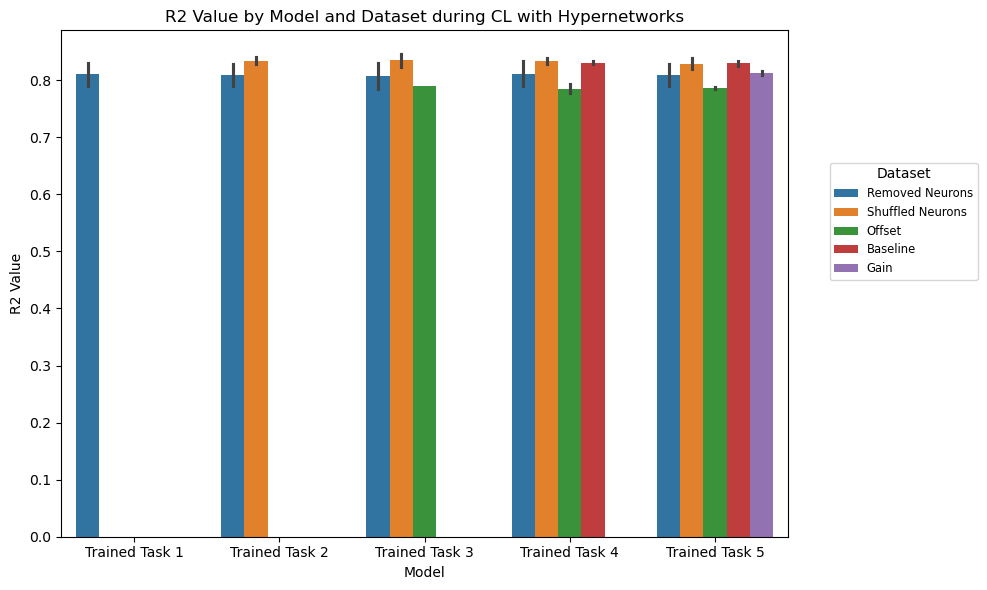

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))

sns.barplot(data=df_plot, x='Model', y='R2', hue='Name')#, color = 'Name', ci=None)  # ci=None to remove confidence intervals

plt.title('R2 Value by Model and Dataset during CL with Hypernetworks')

plt.xlabel('Model')

plt.ylabel('R2 Value')

new_labels = ['Trained Task 1', 'Trained Task 2', 'Trained Task 3', 'Trained Task 4', 'Trained Task 5']  # New labels for x-axis

plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

""" legend_labels = ['Baseline 1', 'Baseline 1', 'Removed Neurons 1', 'Removed Neurons 2',
                 'Shuffled Neurons 1', 'Shuffled Neurons 1', 'Added Gain 1', 'Added Gain 2',
                 'Added Offset 1', 'Added Offset 2']  # New labels for legend """

plt.legend(title='Dataset', fontsize = 'small', 
        bbox_to_anchor=(1.05, 0.75),
        loc='upper left') 
        #labels=legend_labels)  # Move legend to upper left corner

plt.tight_layout()
plt.show()

In [41]:
df_newtasks = df.loc[df.New_Task == True].reset_index()

In [42]:
df_newtasks

,index,Dataset,True_Task,Predicted_Task,New_Task,Y_t_detector,Y_p_detector,R2_Detector,Y_t_hnet,Y_p_hnet,R2_hnet,HNET_training_loss,HNET_val_loss
0,0,Data_1_2,0,0,True,"[[[-0.5063821, -2.0975661], [-0.5946211, -2.02...","[[[-1.0448058, -0.046122804], [-0.8043318, -0....",0.859007,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.0227113 -2.1925476], [-0.72876567 -1.39...",0.832271,"[[7.1528343796730045, 2.0302540573206813, 1.20...","[[5.144099622964859, 4.00249889918736, 3.82725..."
1,1,Data_2_2,1,1,True,"[[[-0.5063821, -2.0975661], [-0.5946211, -2.02...","[[[-1.6927298, -1.1806978], [-1.1462356, -1.29...",0.877267,"[[[[-0.50638213 -2.09756602], [-0.5946211 -2....","[[[[-1.4073123 -1.0367944], [-1.2795377 -1.084...",0.840546,"[[5.301716883074153, 1.4112275475805456, 0.985...","[[3.7056562985692705, 3.2768788380282268, 3.11..."
2,2,Data_4_1,2,2,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.4171102, -0.49287182], [0.06996453, -0.27...",0.858399,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[1.0019972 1.9229199], [-0.28356385 0.1988...",0.791733,"[[8.529887583520678, 4.815251300732295, 3.3537...","[[6.614576142567855, 4.973307728767395, 4.4516..."
3,6,Data_0_1,3,3,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.0849242, -0.80367047], [0.064419724, -0.4...",0.863700,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-1.1707008 -0.25110888], [-0.03565407 1....",0.822125,"[[4.031842376346941, 2.1175469325648413, 1.607...","[[5.090786246153025, 4.370452005129594, 3.9866..."
4,7,Data_3_1,4,4,True,"[[[0.87900066, 0.94454104], [0.46398437, 0.702...","[[[0.14467075, -0.6260636], [0.19228467, -0.21...",0.850675,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-2.4795508 -0.8856158], [0.65449387 0.3214...",0.819000,"[[11.076886152779615, 6.900602820846769, 4.771...","[[9.390485094143795, 7.411092492250296, 6.1893..."


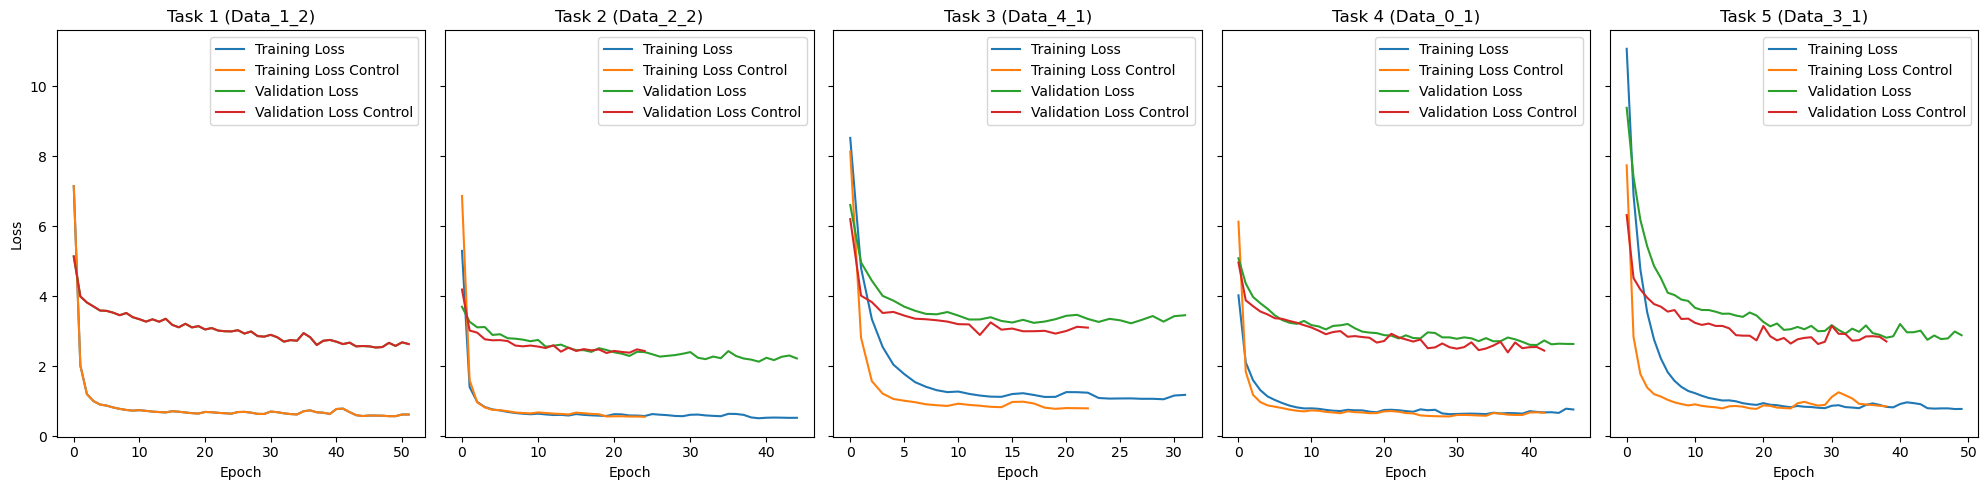

In [47]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for idx, row in df_newtasks.iterrows():
    row_control = df_newtasks_control.iloc[idx]
    axes[idx].plot(row['HNET_training_loss'][0], label='Training Loss')
    axes[idx].plot(row_control['HNET_training_loss'][0], label='Training Loss Control')
    axes[idx].plot(row['HNET_val_loss'][0], label='Validation Loss')
    axes[idx].plot(row_control['HNET_val_loss'][0], label='Validation Loss Control')
    axes[idx].set_title(f'Task {idx + 1} ({row["Dataset"]})')
    axes[idx].set_xlabel('Epoch')
    if idx == 0:
        axes[idx].set_ylabel('Loss')
    axes[idx].legend()

plt.tight_layout()
plt.show()